About Dataset
Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration
To explore this type of models and learn more about the subject.

New version from IBM:**bold text**

1. Import **Libraries**

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

2. Load Dataset
**bold text**

In [23]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [24]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [73]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [74]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1
7042,2226,1,0,0,0,66,1,0,1,2,...,2,2,2,2,2,1,0,105.65,5407,0


In [25]:
df.shape

(7043, 21)

In [26]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [29]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [30]:
df.dropna(inplace=True)

In [31]:
df.isnull().sum().sum()

0

Initialize the **LabelEncoder**

In [35]:
# Initialize the LabelEncoder
le = LabelEncoder()

**Visualisation**

In [42]:
gender = LabelEncoder() ### every column ko distribute in numers
Partner  = LabelEncoder()
Dependents  = LabelEncoder()
PhoneService = LabelEncoder()
MultipleLines = LabelEncoder()
InternetService = LabelEncoder()
MultipleLines = LabelEncoder()
OnlineSecurity = LabelEncoder()
DeviceProtection = LabelEncoder()
TechSupport = LabelEncoder()
StreamingTV = LabelEncoder()
StreamingMovies = LabelEncoder()
Contract = LabelEncoder()
PaperlessBilling = LabelEncoder()
PaymentMethod = LabelEncoder()
Churn = LabelEncoder

In [43]:
# Fit the LabelEncoder and transform the data for each column
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['Churn'] = le.fit_transform(df['Churn'])

print("\nEncoded Data:")
print(df)


Encoded Data:
      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       0              0        1           0       1   
1     5575-GNVDE       1              0        0           0      34   
2     3668-QPYBK       1              0        0           0       2   
3     7795-CFOCW       1              0        0           0      45   
4     9237-HQITU       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB       1              0        1           1      24   
7039  2234-XADUH       0              0        1           1      72   
7040  4801-JZAZL       0              0        1           1      11   
7041  8361-LTMKD       1              1        1           0       4   
7042  3186-AJIEK       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              1            

In [64]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


array([[<Axes: title={'center': 'customerID'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'Partner'}>,
        <Axes: title={'center': 'Dependents'}>],
       [<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'PhoneService'}>,
        <Axes: title={'center': 'MultipleLines'}>,
        <Axes: title={'center': 'InternetService'}>,
        <Axes: title={'center': 'OnlineSecurity'}>],
       [<Axes: title={'center': 'OnlineBackup'}>,
        <Axes: title={'center': 'DeviceProtection'}>,
        <Axes: title={'center': 'TechSupport'}>,
        <Axes: title={'center': 'StreamingTV'}>,
        <Axes: title={'center': 'StreamingMovies'}>],
       [<Axes: title={'center': 'Contract'}>,
        <Axes: title={'center': 'PaperlessBilling'}>,
        <Axes: title={'center': 'PaymentMethod'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>],
  

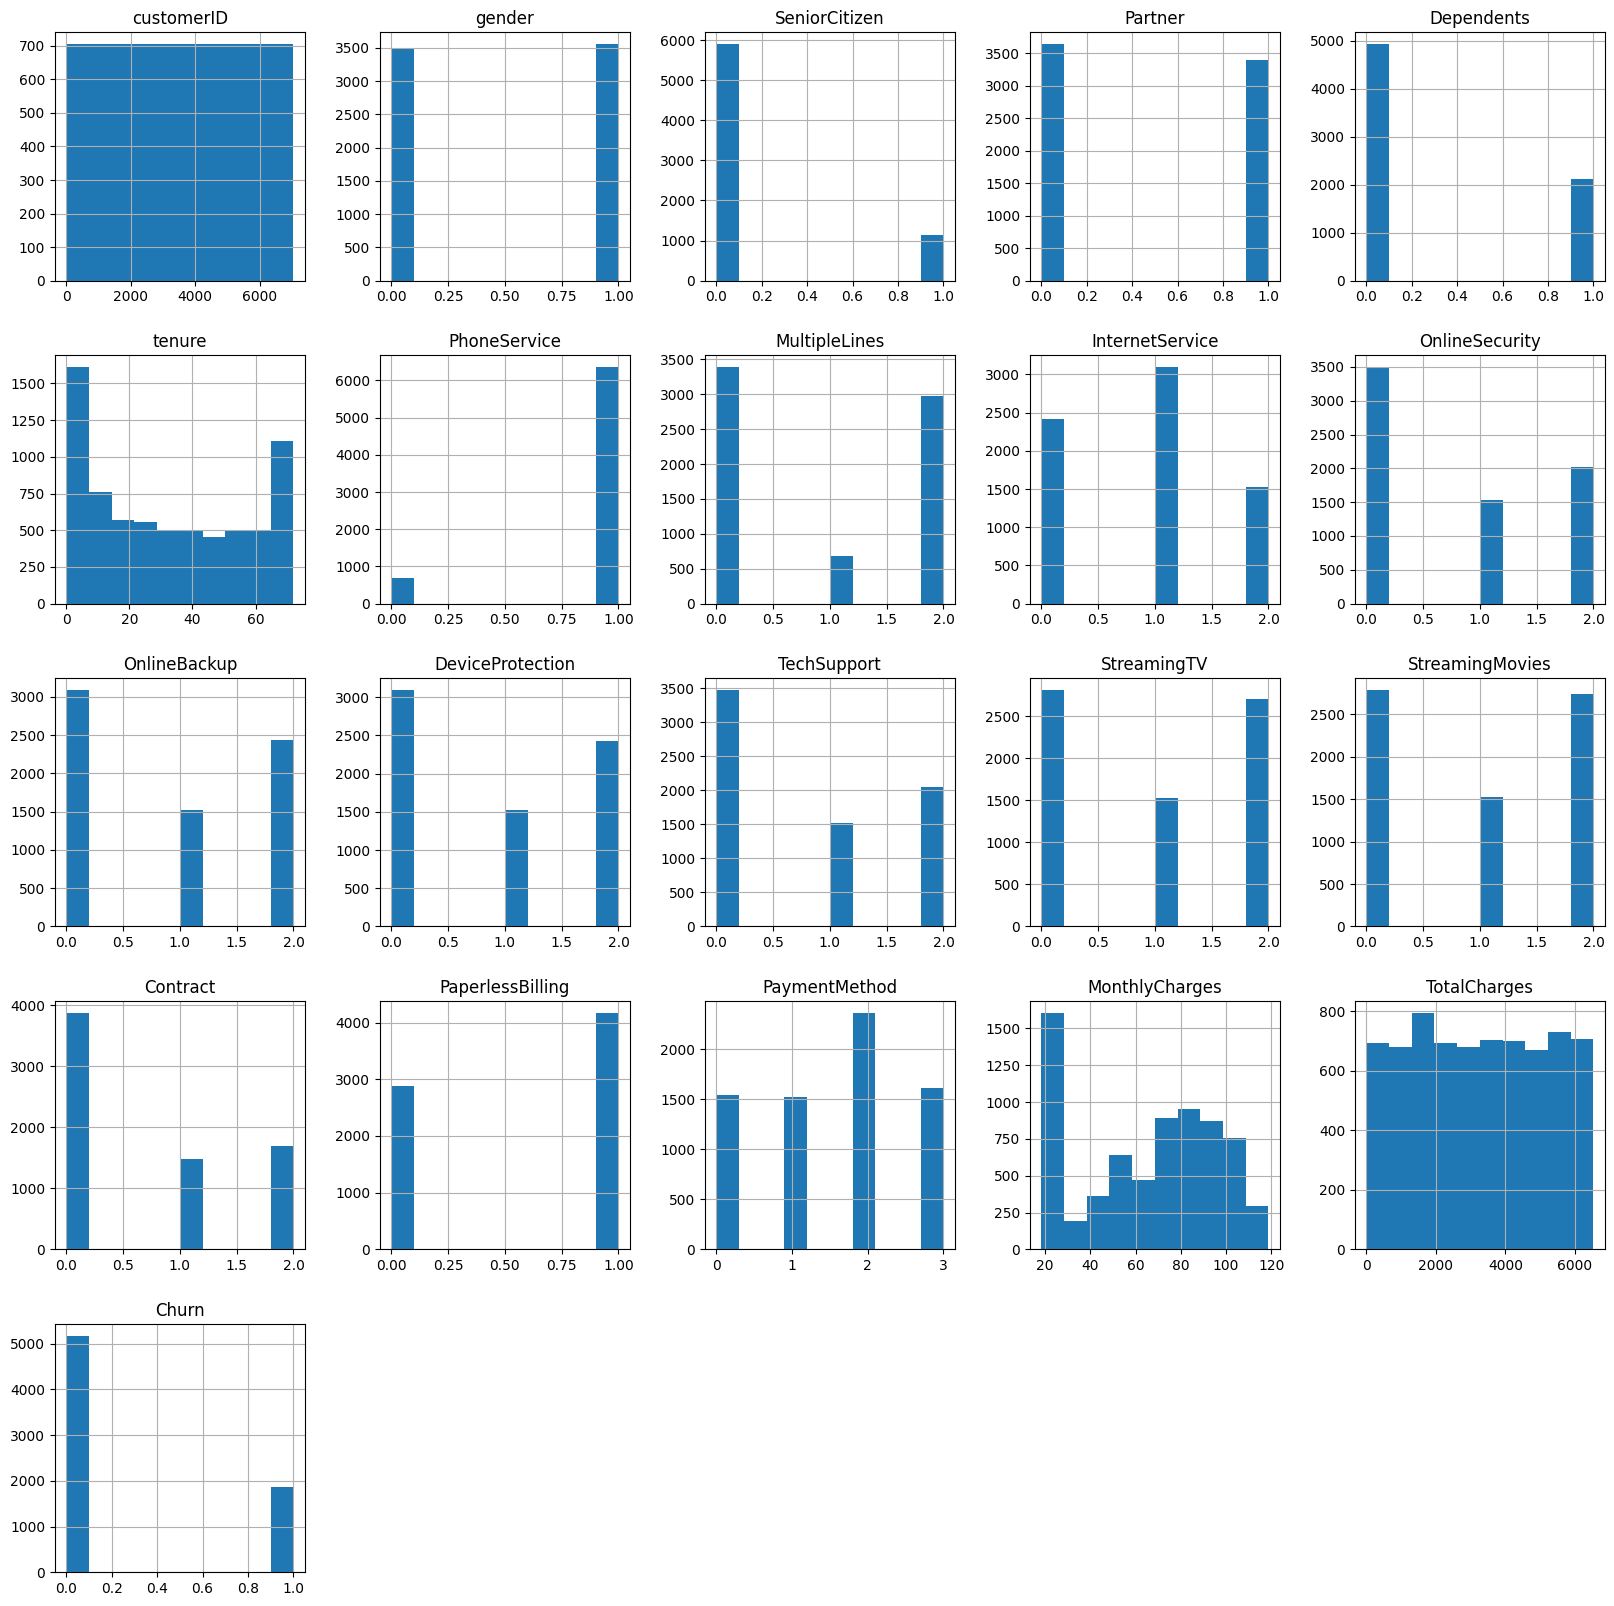

In [70]:
df.hist(figsize = (20,20))

In [44]:
X = df.drop('Churn', axis=1)
y = df['Churn']

3. Split Data into Training and Testing Sets

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [53]:
# For simplicity, let's use only two classes (binary classification)
# We'll select only class 0 and 1
binary_mask = y < 2
X = X[binary_mask]
y = y[binary_mask]

In [57]:
# Encode non-numeric features
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = LabelEncoder().fit_transform(df[column])

In [58]:
# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
# Create a logistic regression model
model = LogisticRegression()

In [60]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [61]:
# Make predictions
y_pred = model.predict(X_test)

In [62]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [63]:
# Print evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[17  0]
 [ 0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

